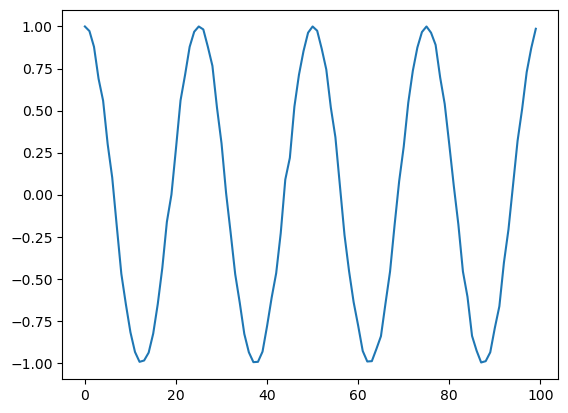

In [1]:
from qiskit import QuantumCircuit, transpile, Aer, assemble,execute
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel
import qiskit.providers.aer.noise as noise
import numpy as np
# Depolarizing quantum errors
error_1 = noise.phase_amplitude_damping_error(0,0.01,1)

# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['id'])

# Get basis gates from noise model
basis_gates = noise_model.basis_gates
nqubits=4
list_res1=[]
Z=np.array([[1,0],[0,-1]])
for k in range(0,100):
    t=k/50
    prob=(1-np.exp(-t**2))/2
    ghz_circuit = QuantumCircuit(nqubits, nqubits)
    evo_gate_matrix = np.array([[0, np.exp(1j*0.5*np.pi*t)], [np.exp(-1j*0.5*np.pi*t), 0]])
    
    # 添加 Hadamard 门到第一个比特上
    ghz_circuit.h(0)

    for k in range(0,nqubits-1):
        ghz_circuit.cx(k, k+1)
    for k in range(nqubits):
        ghz_circuit.unitary(evo_gate_matrix, [k], label='evo')
    for k in range(nqubits):
        ghz_circuit.id(k)
    for k in range(nqubits-2,-1,-1):
        ghz_circuit.cx(k, k+1)

    ghz_circuit.h(0)
    ghz_circuit.measure(0, 0)
    transpiled_circuit = transpile(ghz_circuit, Aer.get_backend('qasm_simulator'))
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(transpiled_circuit, simulator).result()
    counts = result.get_counts()
    probability_0 = sum(value for key, value in counts.items() if key[-1] == '0') / sum(counts.values())
    res1=2*probability_0-1
    list_res1.append(res1)
from matplotlib import pyplot as plt
plt.plot(list_res1)

In [3]:
from qiskit import QuantumCircuit, transpile, Aer, execute
import qiskit.providers.aer.noise as noise
from qiskit.circuit.library import U2Gate,U3Gate
import numpy as np
def errsimu(nqubits):
    list_res1 = []

    for k in range(0, 100):
        t = k / 50
        prob = (1 - np.exp(-t**2)) / 2
        ghz_circuit = QuantumCircuit(nqubits, nqubits)
        error_1=noise.depolarizing_error(prob, 1)
        #error_1=noise.phase_damping_error(prob, 1)
        error_2=noise.depolarizing_error(prob_2, 2)
        noise_model = noise.NoiseModel()
        noise_model.add_all_qubit_quantum_error(error_1, ['u3'])
        noise_model.add_all_qubit_quantum_error(error_2, ['cx'])
        # Get basis gates from noise model
        basis_gates = noise_model.basis_gates
        #ghz_circuit=gencopy(ghz_circuit,0,nqubits,t)
        # 添加 Hadamard 门到第一个比特上
        ghz_circuit.h(0)

        for l in range(0, nqubits - 1):
            ghz_circuit.cx(l, l + 1)

        for l in range(nqubits):
            ghz_circuit.u(np.pi,-t*2*np.pi,0,l)

        for l in range(nqubits - 2, -1, -1):
            ghz_circuit.cx(l, l + 1)

        ghz_circuit.h(0)

        ghz_circuit.measure(0, 0)
        result = execute(ghz_circuit, Aer.get_backend('qasm_simulator'), basis_gates=basis_gates,noise_model=noise_model).result()
        counts = result.get_counts()
        probability_0 = sum(value for key, value in counts.items() if key[-1] == '0') / sum(counts.values())
        res1 = 2 * probability_0 - 1
        list_res1.append(res1)
    return list_res1


In [2]:
def gencopy(circuit, nqubegin, nquend, t, noise_model):
    circuit.h(nqubegin)
    for k in range(nqubegin, nquend-1):
        circuit.cx(k, k+1)
    for k in range(nqubegin, nquend):
        circuit.u(np.pi, -t*2*np.pi, 0, k)
    for k in range(nquend-1, nqubegin, -1):
        circuit.cx(k-1, k)
    circuit.h(nqubegin)
    return circuit


In [15]:
ghz_circuit = QuantumCircuit(nqubits, nqubits)
print(gencopy(ghz_circuit,0,nqubits,0))

     ┌───┐     ┌──────────┐                                       ┌───┐
q_0: ┤ H ├──■──┤ U(π,0,0) ├────────────────────────────────────■──┤ H ├
     └───┘┌─┴─┐└──────────┘┌──────────┐                      ┌─┴─┐└───┘
q_1: ─────┤ X ├─────■──────┤ U(π,0,0) ├───────────────────■──┤ X ├─────
          └───┘   ┌─┴─┐    └──────────┘┌──────────┐     ┌─┴─┐└───┘     
q_2: ─────────────┤ X ├─────────■──────┤ U(π,0,0) ├──■──┤ X ├──────────
                  └───┘       ┌─┴─┐    ├──────────┤┌─┴─┐└───┘          
q_3: ─────────────────────────┤ X ├────┤ U(π,0,0) ├┤ X ├───────────────
                              └───┘    └──────────┘└───┘               
c: 4/══════════════════════════════════════════════════════════════════
                                                                       


     ┌───┐     ┌────────────────┐                            ┌───┐┌─┐
q_0: ┤ H ├──■──┤ U(π,-6.1575,0) ├─────────────────────────■──┤ H ├┤M├
     └───┘┌─┴─┐└────────────────┘┌────────────────┐     ┌─┴─┐└───┘└╥┘
q_1: ─────┤ X ├────────■─────────┤ U(π,-6.1575,0) ├──■──┤ X ├──────╫─
          └───┘      ┌─┴─┐       ├────────────────┤┌─┴─┐└───┘      ║ 
q_2: ────────────────┤ X ├───────┤ U(π,-6.1575,0) ├┤ X ├───────────╫─
                     └───┘       └────────────────┘└───┘           ║ 
c: 3/══════════════════════════════════════════════════════════════╩═
                                                                   0 
NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u3']
  Instructions with noise: ['u3', 'cx']
  All-qubits errors: ['u3', 'cx']


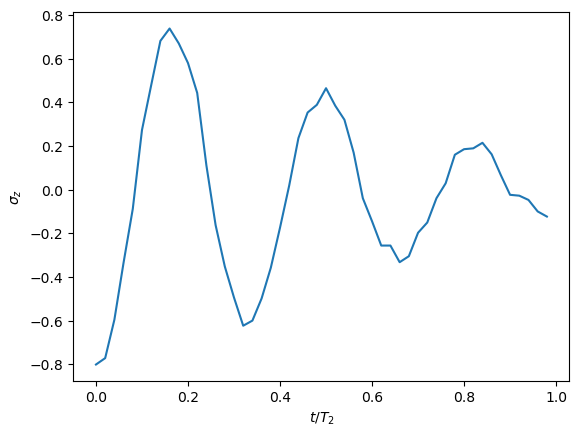

In [4]:
from qiskit import QuantumCircuit, transpile, Aer, execute
import qiskit.providers.aer.noise as noise
from qiskit.circuit.library import U2Gate,U3Gate
import numpy as np


prob_2 = 0.05   # 2-qubit gate

# Depolarizing quantum errors
#error_1 = noise.depolarizing_error(prob_1, 1)
#error_1=noise.phase_damping_error(prob_1, 1)

nqubits=3
list_t=[]
list_res1 = []
Z = np.array([[1, 0], [0, -1]])

for k in range(0, 50):
    t = k / 50
    list_t.append(t)
    prob = (1 - np.exp(-t**2)) / 2
    ghz_circuit = QuantumCircuit(nqubits, nqubits)
    error_1=noise.depolarizing_error(prob, 1)
    #error_1=noise.phase_damping_error(prob, 1)
    error_2=noise.depolarizing_error(prob_2, 2)
    noise_model = noise.NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_1, ['u3'])
    noise_model.add_all_qubit_quantum_error(error_2, ['cx'])
    # Get basis gates from noise model
    basis_gates = noise_model.basis_gates
    #ghz_circuit=gencopy(ghz_circuit,0,nqubits,t)
    # 添加 Hadamard 门到第一个比特上
    ghz_circuit.h(0)

    for l in range(0, nqubits - 1):
        ghz_circuit.cx(l, l + 1)

    for l in range(nqubits):
        ghz_circuit.u(np.pi,-t*2*np.pi,0,l)

    for l in range(nqubits - 2, -1, -1):
        ghz_circuit.cx(l, l + 1)

    ghz_circuit.h(0)
    
    ghz_circuit.measure(0, 0)
    result = execute(ghz_circuit, Aer.get_backend('qasm_simulator'), basis_gates=basis_gates,noise_model=noise_model).result()
    counts = result.get_counts()
    probability_0 = sum(value for key, value in counts.items() if key[-1] == '0') / sum(counts.values())
    res1 = 2 * probability_0 - 1
    list_res1.append(res1)
print(ghz_circuit)
print(noise_model)
from matplotlib import pyplot as plt
plt.plot(list_t,list_res1)
plt.xlabel('$t/T_{2}$')
plt.ylabel('$\sigma_z$')
plt.show()


In [101]:
def mutisense(nqubits,repe):
    list_vd=[]
    N=2
    nqu=N*nqubits+1
    list_exp1=[]
    list_exp2=[]
    repetitions=10000*repe
    for k in range(0, 100):
        t = k / 50
        prob = (1 - np.exp(-t**2)) / 2
        prob2=0
        #error_1=noise.depolarizing_error(prob, 1)
        error_1=noise.phase_damping_error(prob, 1)
        error_2=noise.depolarizing_error(prob_2, 2)
        noise_model = noise.NoiseModel()
        noise_model.add_all_qubit_quantum_error(error_1, ['u3'])
        noise_model.add_all_qubit_quantum_error(error_2, ['cx'])
        # Get basis gates from noise model
        basis_gates = noise_model.basis_gates
        circ = QuantumCircuit(nqu, 1)
        circ.h(0)
        circ=gencopy(circ,1,nqubits+1,t,noise_model)
        circ=gencopy(circ,nqubits+1,nqu,t,noise_model)
        for k in range(1,nqubits+1):
            circ.cswap(0,k,k+nqubits)
        circ.cz(0,1)
        circ.h(0)
        circ.measure(0, 0)
        sim=Aer.get_backend('qasm_simulator')
        result = execute(circ, sim, noise_model=noise_model,basis_gates=basis_gates, shots=repetitions).result()
        counts = result.get_counts()
        probability_0 = counts.get('0', 0) / repetitions
        exp1=2*probability_0-1
        list_exp1.append(exp1)
        circ = QuantumCircuit(nqu, 1)
        circ.h(0)
        circ=gencopy(circ,1,nqubits+1,t,noise_model)
        circ=gencopy(circ,nqubits+1,nqu,t,noise_model)
        for k in range(1,nqubits+1):
            circ.cswap(0,k,k+nqubits)
        circ.h(0)
        circ.measure(0, 0)
        result = execute(circ, sim, noise_model=noise_model, basis_gates=basis_gates,shots=repetitions).result()
        counts = result.get_counts()
        probability_0 = counts.get('0', 0) / repetitions
        exp2=2*probability_0-1
        list_exp2.append(exp2)
        list_vd.append(exp1/exp2)
    return list_vd

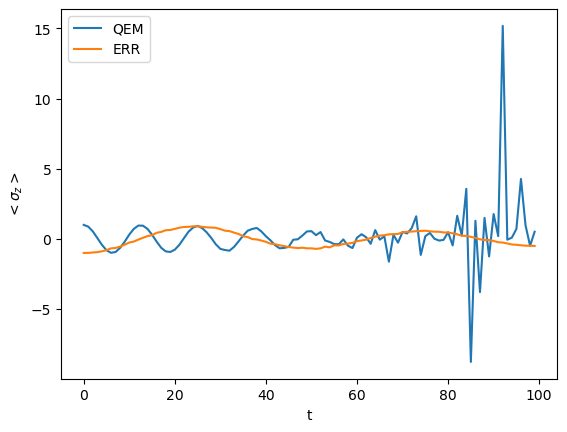

KeyboardInterrupt: 

In [103]:
for k in range(1,6):
    list_qem=mutisense(k,k)
    list_res1=errsimu(k)
    plt.plot(list_qem,label='QEM')
    plt.plot(list_res1,label='ERR')
    plt.xlabel('t')
    plt.ylabel('$<\sigma_{z}>$')
    plt.legend()
    plt.show()

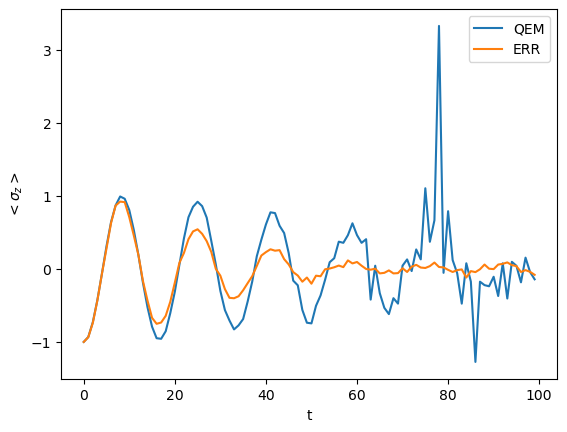

In [98]:
from matplotlib import pyplot as plt
plt.plot(list_vd,label='QEM')
plt.plot(list_res1,label='ERR')
plt.xlabel('t')
plt.ylabel('$<\sigma_{z}>$')
plt.legend()
plt.show()

In [11]:
list_vd=[]
N=3
nqubits=2
nqu=N*nqubits+1
list_exp1=[]
list_exp2=[]
repetitions=10000*(nqu**2)
for k in range(0, 50):
    t = k / 50
    prob = (1 - np.exp(-t**2)) / 2
    print(prob)
    prob2=0.05
    #error_1=noise.depolarizing_error(prob, 1)
    error_1=noise.phase_damping_error(prob, 1)
    error_2=noise.depolarizing_error(prob_2, 2)
    noise_model = noise.NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_1, ['u3'])
    noise_model.add_all_qubit_quantum_error(error_2, ['cx'])
    # Get basis gates from noise model
    basis_gates = noise_model.basis_gates
    circ = QuantumCircuit(nqu, 1)
    circ.h(0)
    
    for copy in range(1,N+1):
        circ=gencopy(circ,(copy-1)*nqubits+1,copy*nqubits+1,t,noise_model)

    for copy in range(1,N):
        for k in range(1,nqubits+1):
            circ.cswap(0,k,k+copy*nqubits)

    circ.cz(0,1)
    circ.h(0)
    circ.measure(0, 0)
    sim=Aer.get_backend('qasm_simulator')
    result = execute(circ, sim, noise_model=noise_model,basis_gates=basis_gates, shots=repetitions).result()
    counts = result.get_counts()
    probability_0 = counts.get('0', 0) / repetitions
    exp1=2*probability_0-1
    list_exp1.append(exp1)
    circ = QuantumCircuit(nqu, 1)
    circ.h(0)
    for copy in range(1,N+1):
        circ=gencopy(circ,(copy-1)*nqubits+1,copy*nqubits+1,t,noise_model)
    for copy in range(1,N):
        for k in range(1,nqubits+1):
            circ.cswap(0,k,k+copy*nqubits)
    circ.h(0)
    circ.measure(0, 0)
    result = execute(circ, sim, noise_model=noise_model, basis_gates=basis_gates,shots=repetitions).result()
    counts = result.get_counts()
    probability_0 = counts.get('0', 0) / repetitions
    exp2=2*probability_0-1
    list_exp2.append(exp2)
    list_vd.append(exp1/exp2)
print(circ)

0.0
0.0001999600053327888
0.0007993603411968198
0.0017967638845033385
0.003189781810425507
0.004975083125415947
0.007148407938778523
0.009704584398785798
0.012637549199103038
0.015940371541718623
0.01960528042383841
0.023623695098394515
0.027986258541082165
0.03268287374127565
0.03770274261989465
0.04303440736438591
0.04866579395952897
0.05458425768284558
0.06077663032503433
0.06722926888911701
0.07392810551689433
0.08085869838788323
0.0880062833341484
0.09535582591433395
0.10289207369172665
0.11059960846429756
0.11846289819933198
0.1264663484314022
0.13459435288999805
0.14283134313202123
0.1511618369644845
0.15957048545403762
0.16804211833226324
0.1765617876189351
0.18511480929949847
0.19368680290779194
0.2022637288803651
0.21083192356452796
0.21937813177838256
0.22788953683739632
0.23635378797847573
0.24475902512885533
0.2530939009833269
0.26134760036927707
0.2695098568945832
0.27757096688852945
0.2855218006604635
0.2933538111148279
0.30105903977439763
0.3086301202759655
     ┌───┐  

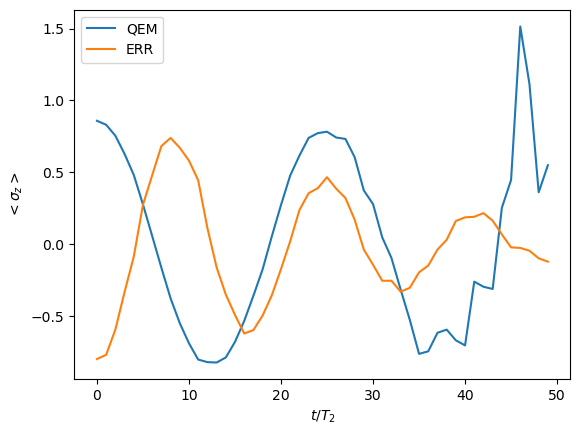

In [12]:
from matplotlib import pyplot as plt
plt.plot(list_vd,label='QEM')
plt.plot(list_res1,label='ERR')
plt.xlabel('$t/T_{2}$')
plt.ylabel('$<\sigma_{z}>$')
plt.legend()
plt.show()